In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/majerek/Desktop/Pollub/wyklady/AMLM':
  os.chdir(r'/Users/majerek/Desktop/Pollub/wyklady/AMLM')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/importlib/_bootstrap.py": 1679689197.4496322, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/importlib/_bootstrap_external.py": 1679689197.4561486, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/codecs.py": 1679689193.856249, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/encodings/aliases.py": 1679689196.08886, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/encodings/__init__.py": 1679689196.0828786, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/encodings/utf_8.py": 1679689196.805846, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/abc.py": 1679689193.7490916, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/io.py": 1679689194.1649137, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/warnings.py": 1679689194.8453767, "/Users/majerek/miniconda3/envs/tensorflow/lib/python3.10/stat.py": 1679689194.5637498, "/Users/majerek/miniconda3/envs/tensorflo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, ReLU, LeakyReLU, ELU
from keras.callbacks import EarlyStopping
import keras

In [3]:
# generowanie danych do zadania
X, y = make_regression(n_samples=700, n_features=10, n_informative = 8, n_targets=3, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

n_neurons = [10,20,50]

In [4]:
def get_model(n_inputs, n_outputs, n_neurons):
  model = Sequential()
  model.add(Dense(int(n_neurons), input_dim=n_inputs, activation='relu'))
  model.add(Dense(n_outputs, activation='linear'))
  model.compile(loss='mse', optimizer='adam')
  return model

In [5]:
# ocena dopasowania modelu z wykorzystaniem CV
def evaluate_model(X, y, n_neurons):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# definicja CV
	cv = RepeatedKFold(n_splits=5, random_state=1)
	# pętla po foldach
	for train_ix, test_ix in cv.split(X):
		# przygotowanie danych
		X_tr, X_te = X[train_ix], X[test_ix]
		y_tr, y_te = y[train_ix], y[test_ix]
		# określenie modelu
		model = get_model(n_inputs, n_outputs, n_neurons)
		# dopasowanie modelu
		model.fit(X_tr, y_tr, verbose=0, epochs=100)
		# ocena dopasowania na foldzie testowym
		mae = model.evaluate(X_te, y_te, verbose=0)
		results.append(mae)
	return results

In [6]:
#| eval: false

results = []
for i in n_neurons:
  # dopasuj i oceń model na zbiorze uczącym
  results.append(np.mean(evaluate_model(X_train, y_train, i)))

In [7]:
results = np.load("./data/mlp_eval.npz")
results = results['arr_0'].tolist()
for i in range(len(n_neurons)):
  print(f"Dla {n_neurons[i]} neuronów MAE: {results[i]:.0f}")

Dla 10 neuronów MAE: 16409
Dla 20 neuronów MAE: 9806
Dla 50 neuronów MAE: 3779


In [8]:
keras.utils.set_random_seed(44)
my_callbacks = [
    EarlyStopping(patience=2)
]

model = get_model(X_train.shape[1], y_train.shape[1], 50)
history = model.fit(X_train, y_train, 
                    verbose=0, epochs=1000, 
                    validation_split=0.2, callbacks=my_callbacks)

Metal device set to: Apple M1


2024-01-13 22:08:24.086819: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


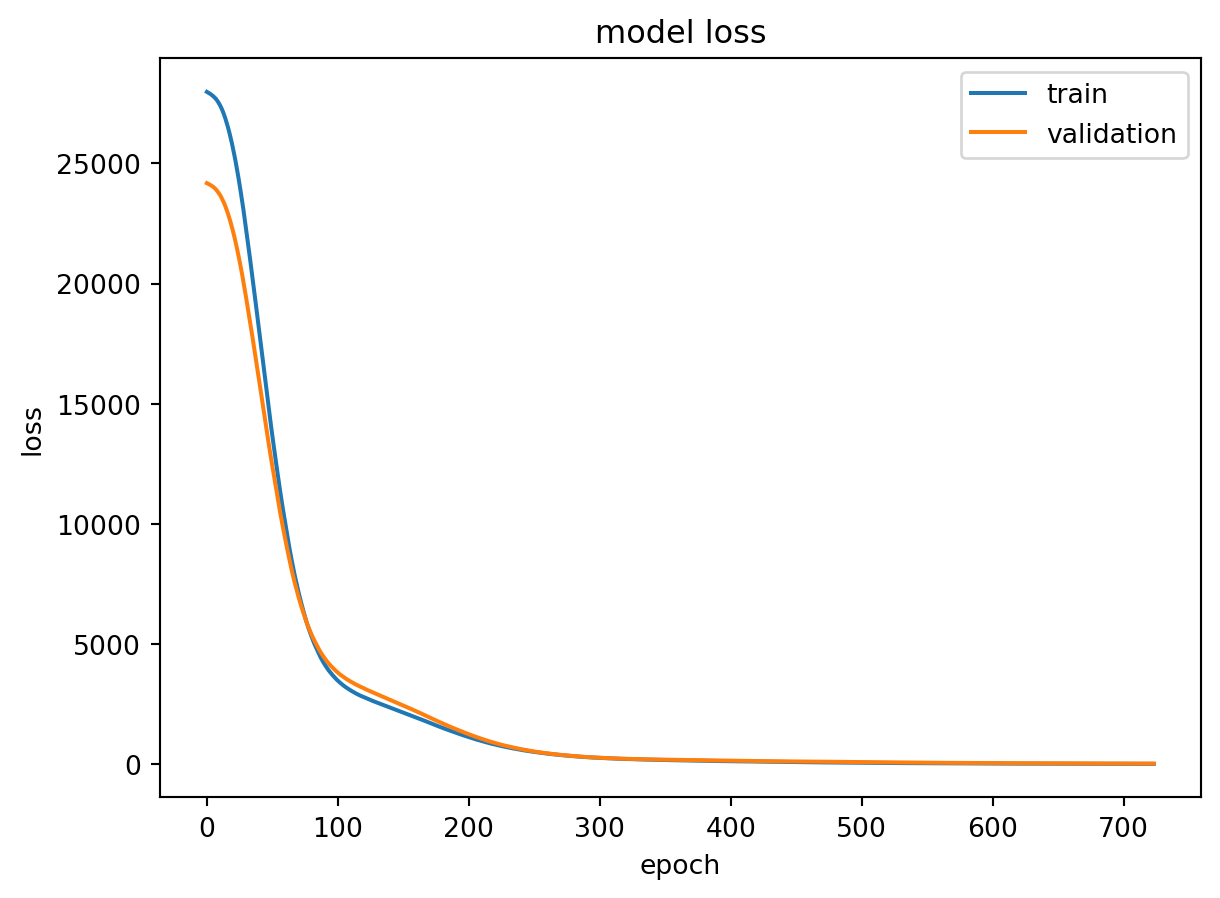

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [10]:
y_pred = model.predict(X_test, verbose=0)
rmse_mlp = mean_squared_error(y_test, y_pred, squared=False)
r2_mlp = r2_score(y_test, y_pred)
print(f"R2 on test sample: {r2_mlp:.2f}")
print(f"RMSE on test sample: {rmse_mlp:.1f}")

R2 on test sample: 1.00
RMSE on test sample: 4.5


In [11]:
from sklearn.preprocessing import StandardScaler
dt = pd.read_csv("./data/original.csv", index_col = "id")
combinations = dt.loc[:,'EC1':'EC6'].value_counts().index.to_numpy()
idx = dt.loc[:,'EC1':'EC6'].value_counts().to_numpy()
bad_combinations = combinations[idx<10]
idx = []
for i in range(len(dt)):
  idx.append(True)
  for j in range(len(bad_combinations)):
    if all(dt.iloc[i, 31:] == bad_combinations[j]):
      idx[i]=False

dt = dt.iloc[idx,:]

y = dt.iloc[:,31:].to_numpy()
X = dt.iloc[:,:31].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

scaler = StandardScaler().fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [12]:
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1]))
model.add(ReLU())
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

opt = keras.optimizers.Nadam(0.001)
model.compile(loss='binary_crossentropy', optimizer=opt)
model.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense_2 (Dense)             (None, 15)                480       


 re_lu (ReLU)                (None, 15)                0         


 dropout (Dropout)           (None, 15)                0         


 dense_3 (Dense)             (None, 6)                 96        


Total params: 576


Trainable params: 576


Non-trainable params: 0


_________________________________________________________________


In [13]:
keras.utils.set_random_seed(44)
my_callbacks = [
    EarlyStopping(patience=10)
]
history = model.fit(X_train, y_train, epochs=1000,  validation_split=0.4, verbose=0,
callbacks=my_callbacks)

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x15xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceS

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x30x1x15xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x30x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceS

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

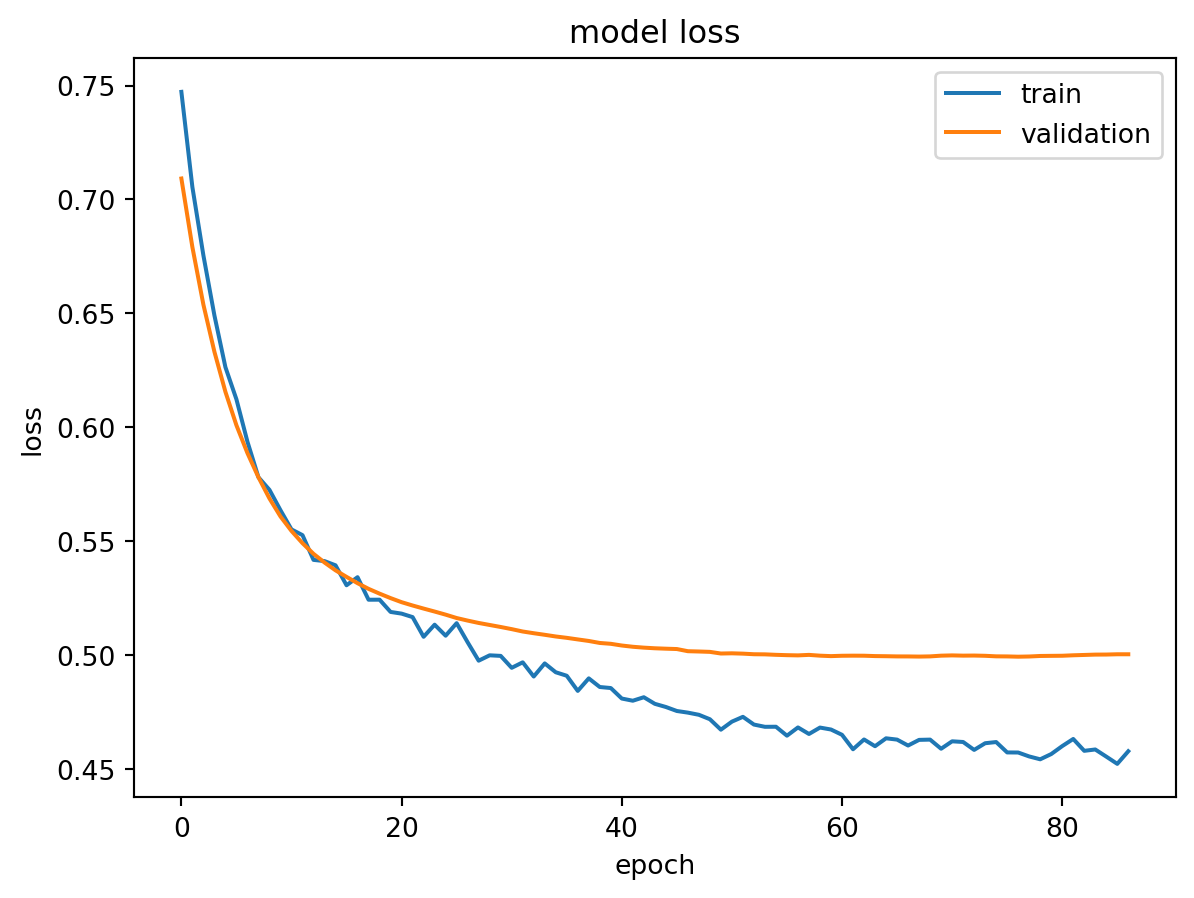

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test, verbose=0)
y_class = y_pred.round()
acc = accuracy_score(y_test, y_class)
print(f"ACC on test sample: {acc:.3f}")

ACC on test sample: 0.190
